In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('credit_score.csv')

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [7]:
df.rename(columns={'Age': 'Idade', 'Gender': 'Genero', 'Income': 'Renda', 'Education': 'Educação', 'Marital Status': 'Estado_civil', 'Number of Children': 'Numero_de_filhos', 'Home Ownership': 'Casa_propia', 'Credit Score': 'Score_de_credito'}, inplace=True)

In [8]:
df.head()

,Idade,Genero,Renda,Educação,Estado_civil,Numero_de_filhos,Casa_propia,Score_de_credito
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [9]:
df['Casa_propia'].unique()

array(['Rented', 'Owned'], dtype=object)

In [11]:
df.groupby(['Renda']).size()

Renda
25000     1
27500     4
30000     1
32500     4
35000     1
37500     4
40000     1
45000     3
47500     5
50000     3
52500     4
55000     4
57500     7
60000     4
62500     5
65000     4
67500     5
68000     1
70000     3
72500     2
75000     4
77500     5
80000     4
82000     1
82500     2
85000     8
87500     5
90000     7
92500     3
95000     7
97500     2
100000    4
102500    1
105000    7
110000    4
112500    3
115000    3
117500    3
120000    1
122500    2
125000    3
127500    1
130000    4
135000    2
137500    1
140000    2
142500    2
145000    1
150000    2
155000    2
160000    1
162500    1
dtype: int64

In [12]:
df.isnull().sum()

Idade               0
Genero              0
Renda               0
Educação            0
Estado_civil        0
Numero_de_filhos    0
Casa_propia         0
Score_de_credito    0
dtype: int64

In [13]:
df.describe()

,Idade,Renda,Numero_de_filhos
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


Vamos vamos avaliar os outliers das colunas que são numericas.

In [17]:
# Vamos carregar em uma lista as variaveis que são do tipo INT64
variaveis_numericas = []
for i in df.columns[0:10].tolist():
    if df.dtypes[i] == 'int64':
        print(i, ":" , df.dtypes[i])
        variaveis_numericas.append(i)

Idade : int64
Renda : int64
Numero_de_filhos : int64


In [19]:
variaveis_numericas

['Idade', 'Renda', 'Numero_de_filhos']

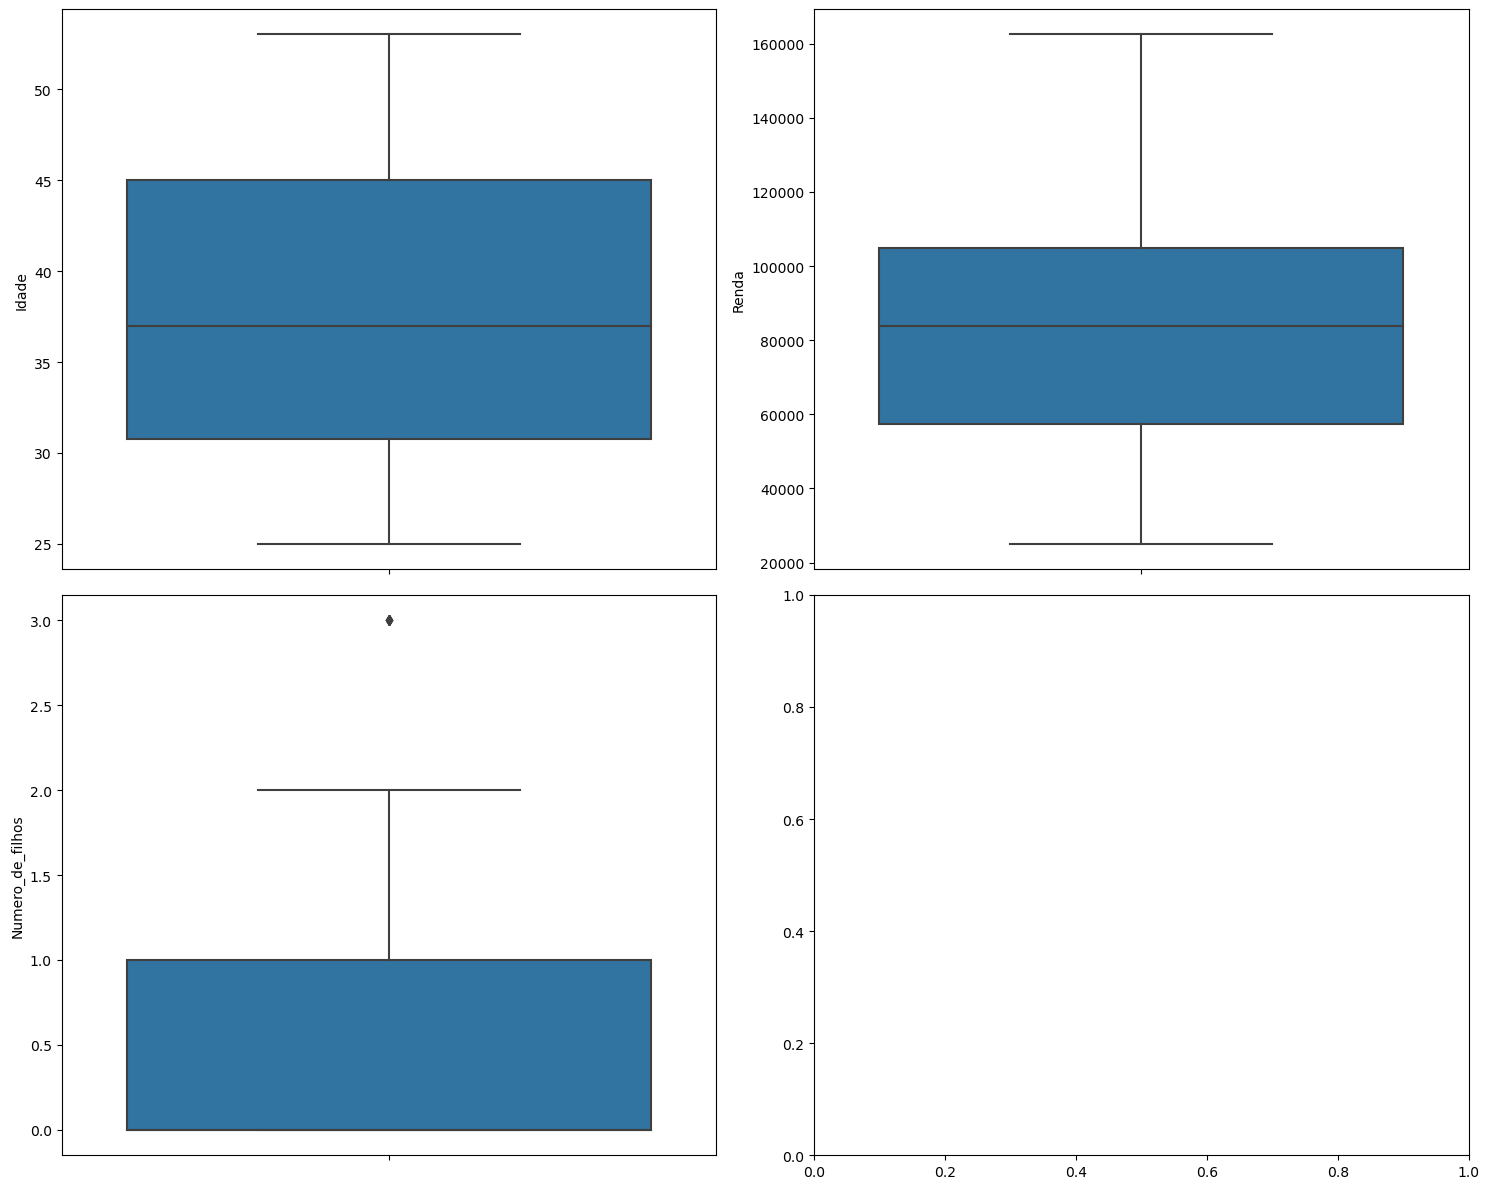

In [29]:
# Vamos exibir todos os graficos de uma vez para facilitar nossa analise.

# aqui definimos o tamanho da tela para exibição dos gráficos.
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True


# Aqui definimos em quantas linhas e colunas queremos exibir os graficos
f, axes = plt.subplots(2, 2) # 2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

Neste caso os dados encontrados não são considerados outliers, é normal uma pessoa ter 3 filhos, então não precisaremos tratar esse dado.

In [30]:
df.groupby(['Estado_civil']).size()

Estado_civil
Married    87
Single     77
dtype: int64

In [31]:
df.groupby(['Educação']).size()

Educação
Associate's Degree     25
Bachelor's Degree      42
Doctorate              31
High School Diploma    30
Master's Degree        36
dtype: int64

In [32]:
df.groupby(['Idade']).size()

Idade
25    9
26    6
27    5
28    6
29    6
30    9
31    6
32    6
33    6
34    6
35    9
36    5
37    5
38    5
39    5
40    5
41    5
42    5
43    5
44    5
45    5
46    5
47    5
48    5
49    5
50    5
51    5
52    5
53    5
dtype: int64

Agora vamos gerar um gráfico de histograma para avaliar a distribuição dos dados

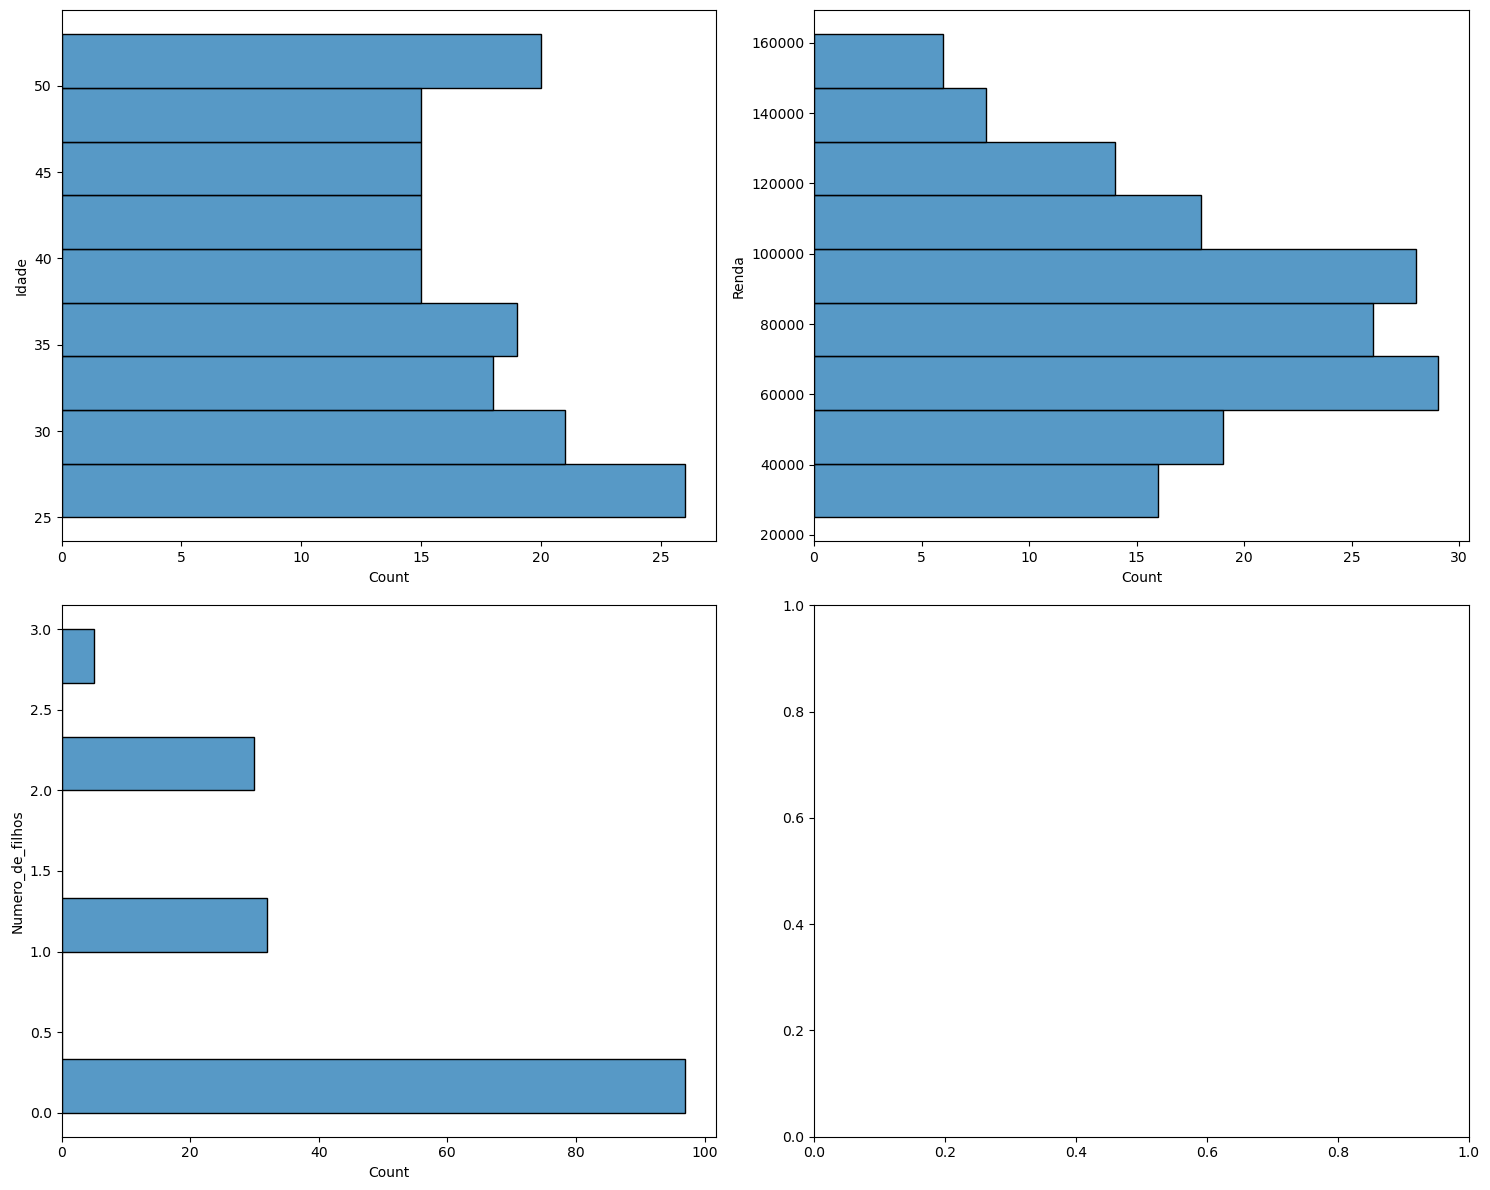

In [33]:
# aqui definimos o tamanho da tela para exibição dos gráficos.
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True


# Aqui definimos em quantas linhas e colunas queremos exibir os graficos
f, axes = plt.subplots(2, 2) # 2 linhas e 5 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

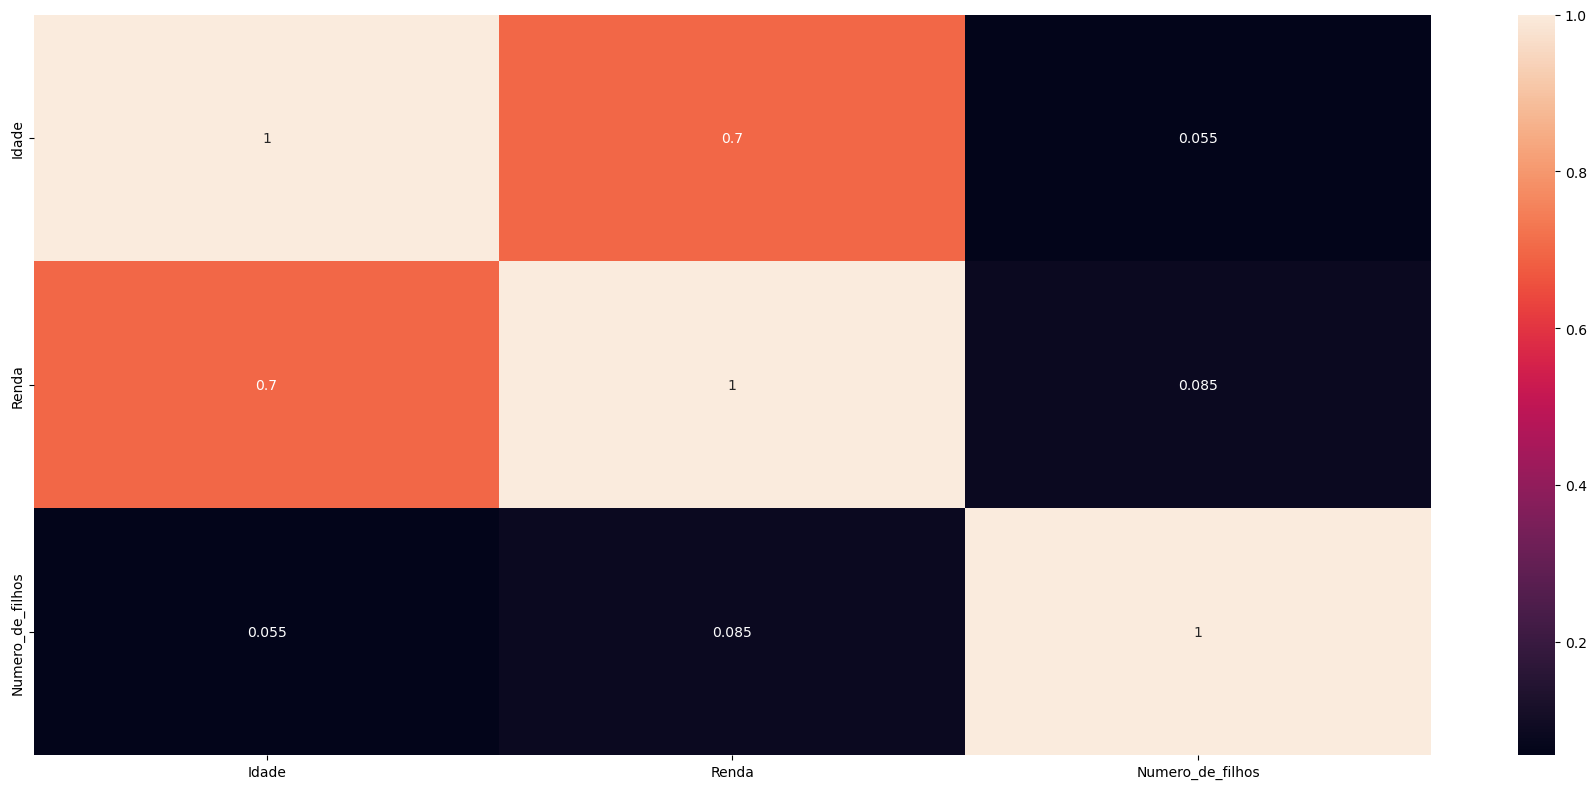

In [34]:
# Através do hitmap podemos visualizar a correção entre todas as variaveis.

plt.rcParams["figure.figsize"] = (18,8)
ax = sns.heatmap(df.corr(), annot=True)

In [39]:
credit_mapping = {
    "High": 3,
    "Average": 2,
    "Low": 1
}

df['Score_de_credito'] = df['Score_de_credito'].map(credit_mapping)

In [42]:
print('maior idade: ', df['Idade'].min())
print('menor idade: ', df['Idade'].max())

maior idade:  25
menor idade:  53


In [43]:
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ["Até 30", "31 a 40", "41 a 50", "Maior que 50"]

df["Faixa_etaria"] = pd.cut(df["Idade"], idade_bins, labels=idade_categoria)

df["Faixa_etaria"].value_counts()

31 a 40         58
41 a 50         50
Até 30          41
Maior que 50    15
Name: Faixa_etaria, dtype: int64

In [45]:
df.groupby(["Faixa_etaria"]).median()["Score_de_credito"]

Faixa_etaria
Até 30          2.0
31 a 40         3.0
41 a 50         3.0
Maior que 50    3.0
Name: Score_de_credito, dtype: float64

In [46]:
# Vamos carregar em uma lista as variaveis que são do tipo INT64
variaveis_numericas = []
for i in df.columns[0:10].tolist():
    if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':
        print(i, ":" , df.dtypes[i])
        variaveis_numericas.append(i)

Genero : object
Educação : object
Estado_civil : object
Casa_propia : object
Faixa_etaria : category


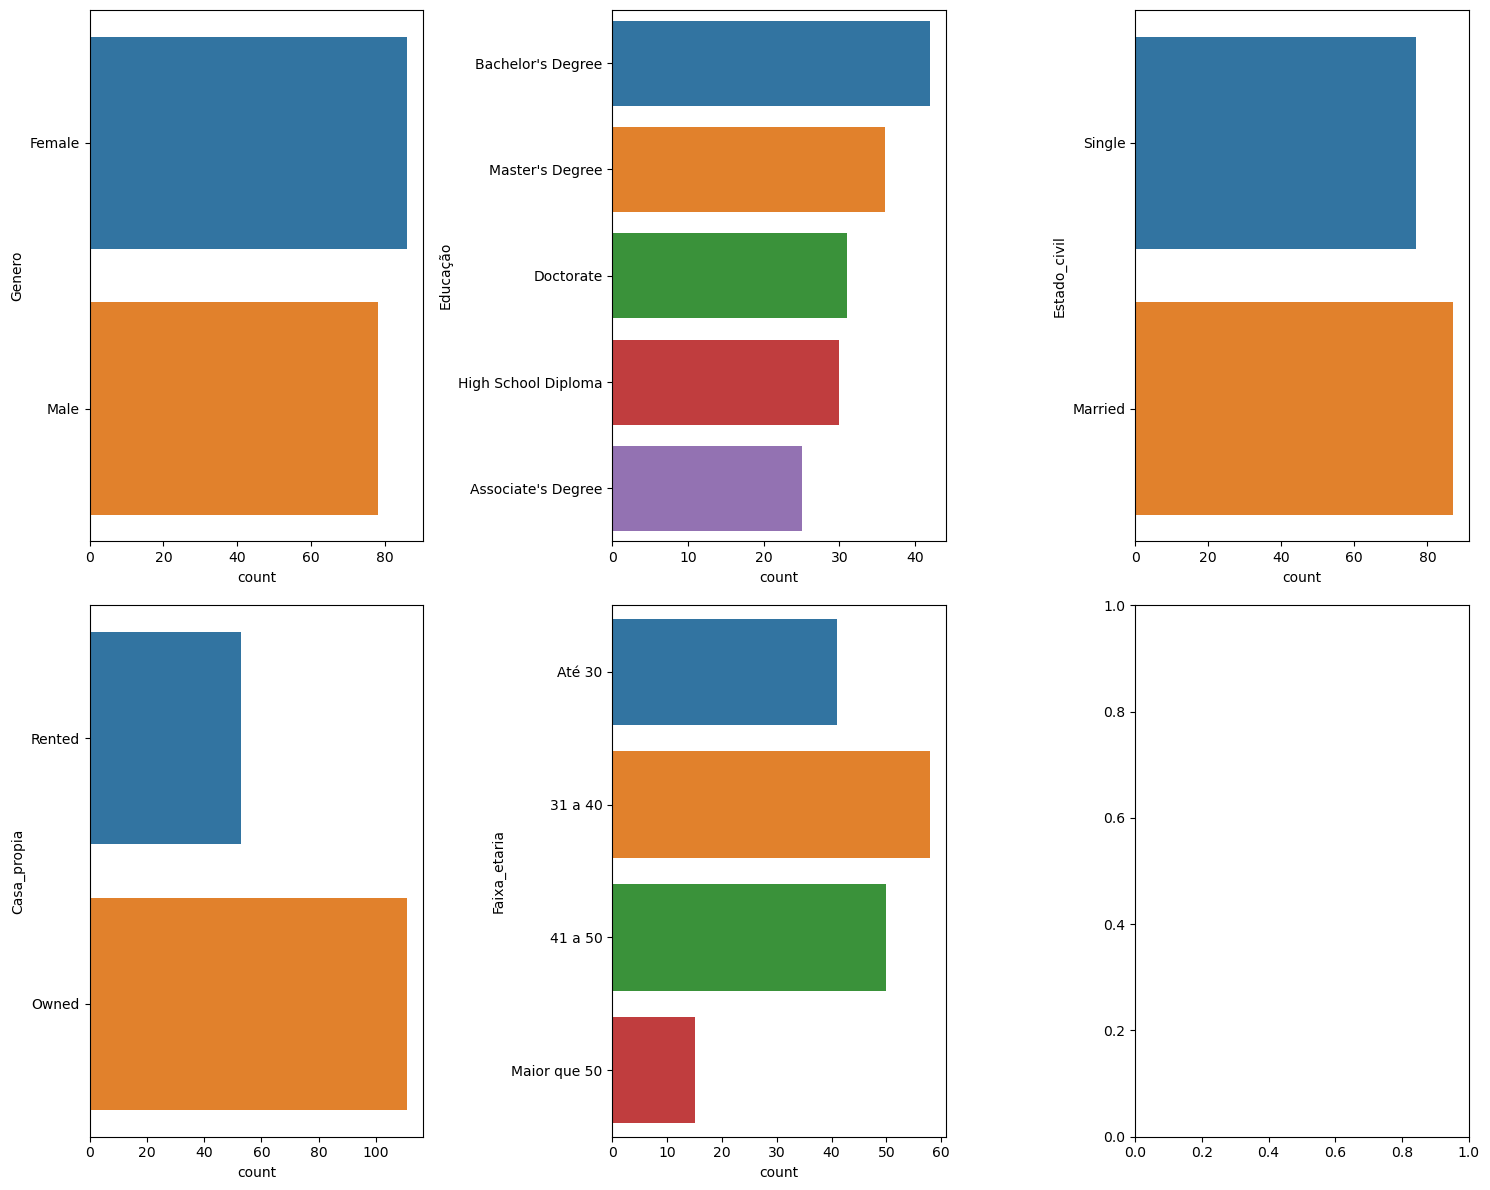

In [47]:

# aqui definimos o tamanho da tela para exibição dos gráficos.
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True


# Aqui definimos em quantas linhas e colunas queremos exibir os graficos
f, axes = plt.subplots(2, 3) # 2 linhas e 3 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.countplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()

Agora vamos começar o pré processamento dos dados

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Idade             164 non-null    int64   
 1   Genero            164 non-null    object  
 2   Renda             164 non-null    int64   
 3   Educação          164 non-null    object  
 4   Estado_civil      164 non-null    object  
 5   Numero_de_filhos  164 non-null    int64   
 6   Casa_propia       164 non-null    object  
 7   Score_de_credito  164 non-null    int64   
 8   Faixa_etaria      164 non-null    category
dtypes: category(1), int64(4), object(4)
memory usage: 10.7+ KB


In [52]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variaveis que estão como string
df['Genero'] = lb.fit_transform(df['Genero'])
df['Educação'] = lb.fit_transform(df['Educação'])
df['Estado_civil'] = lb.fit_transform(df['Estado_civil'])
df['Casa_propia'] = lb.fit_transform(df['Casa_propia'])
df['Faixa_etaria'] = lb.fit_transform(df['Faixa_etaria'])

#Remove valores missing eventualmente gerados
df.dropna(inplace=True)

In [53]:
df.head(200)

,Idade,Genero,Renda,Educação,Estado_civil,Numero_de_filhos,Casa_propia,Score_de_credito,Faixa_etaria
0,25,0,50000,1,1,0,1,3,2
1,30,1,100000,4,0,2,0,3,2
2,35,0,75000,2,0,1,0,3,0
3,40,1,125000,3,1,0,0,3,0
4,45,0,100000,1,0,3,0,3,1
...,...,...,...,...,...,...,...,...,...
159,29,0,27500,3,1,0,1,1,2
160,34,1,47500,0,1,0,1,2,0
161,39,0,62500,1,0,2,0,3,0
162,44,1,87500,4,1,0,0,3,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Idade             164 non-null    int64
 1   Genero            164 non-null    int64
 2   Renda             164 non-null    int64
 3   Educação          164 non-null    int64
 4   Estado_civil      164 non-null    int64
 5   Numero_de_filhos  164 non-null    int64
 6   Casa_propia       164 non-null    int64
 7   Score_de_credito  164 non-null    int64
 8   Faixa_etaria      164 non-null    int64
dtypes: int64(9)
memory usage: 11.7 KB


In [56]:
# separando a variavel alvo
target = df.iloc[df['Score_de_credito']]

In [57]:
# Separando as variaveis preditoras

preditoras = df.copy()

del preditoras['Score_de_credito']

preditoras.head()

,Idade,Genero,Renda,Educação,Estado_civil,Numero_de_filhos,Casa_propia,Faixa_etaria
0,25,0,50000,1,1,0,1,2
1,30,1,100000,4,0,2,0,2
2,35,0,75000,2,0,1,0,0
3,40,1,125000,3,1,0,0,0
4,45,0,100000,1,0,3,0,1


In [59]:
# divisao em dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size = 0.4, random_state = 40)

In [61]:
# Vamos aplicar a normalização em treino e teste

sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(x_treino)
X_teste_normalizados = sc.transform(x_teste)

Criar, Avaliar e testar nosso modelo preditivo

In [62]:
# treina o modelo
modelo = LinearRegression(normalize = True, fit_intercept = True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [63]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.745579203091303

Aqui conseguimos definir a acuracia do nosso modelo preditivo, que foi de 75%. Ou seja, a cada 100 registros que passarmos no nosso modelo, ele vai acertar cerca de 75.